In [12]:
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

batch_size = 256
classes = 10

def Relu(y):
    return torch.maximum(torch.tensor(0), y)

def doropout(y, ratio=0.5, train = False):
    if train == True:
        x = torch.rand((y.shape))
        mask = x < ratio
        return y*mask
    else:
        return y*(1-ratio)
    

def softmax(y):
    for i in range(len(y)):
        y[i] = torch.exp(y[i])/torch.sum(torch.exp(y[i]))
    return y  
        
def cross_entropy_loss(p, q):
    tmp = torch.zeros((len(q), classes))
    for i in range((len(q))):
        tmp[i][p[i].item()] += 1.0
    
    ans = torch.zeros((len(q)))
    #delta = 1e-7 #inf防止
    delta = 0
    for i in range((len(q))):
        ans[i] = torch.sum(-(tmp[i]*torch.log(q[i]+delta)))    
    return torch.mean(ans)

def whichclass(pred_y):
    _, label = torch.max(pred_y, 1)
    return label

In [17]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5))])

fashion_mnist_train = FashionMNIST("FashionMNIST", train=True, download=True, transform=transform)
fashion_mnist_test = FashionMNIST("FashionMNIST", train=False, download=True, transform=transform)

train_loader = DataLoader(fashion_mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=True)

w1 = torch.normal(0, 0.01, size=(28*28, 256), requires_grad=True)
b1 = torch.zeros(256, requires_grad=True)
w2 = torch.normal(0, 0.01, size=(256, classes), requires_grad=True)
b2 = torch.zeros(classes, requires_grad=True)

epoch_num = 100
optimizer = optim.SGD([w1, b1, w2, b2], lr = 0.02)
running_loss = np.zeros(epoch_num)

for epoch in range(epoch_num):
    for i, (images, labels) in enumerate(train_loader): 
        images = images.view(-1,28*28)
        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            outputs = torch.matmul(images, w1)+ b1
            outputs = Relu(outputs)
            outputs = doropout(outputs, train = True)
            outputs = torch.matmul(outputs, w2)+ b2
            pred_y = softmax(outputs)                 
            loss = cross_entropy_loss(labels, pred_y) 
            running_loss[epoch] += torch.sum(loss)/batch_size

        loss.backward()
        optimizer.step()                              
        
    print("epoch : %d, loss : %.4lf" % (epoch, running_loss[epoch]))
        
        
print(running_loss)

epoch : 0, loss : 1.6930
epoch : 1, loss : 0.9734
epoch : 2, loss : 0.7613
epoch : 3, loss : 0.6767
epoch : 4, loss : 0.6280
epoch : 5, loss : 0.5950
epoch : 6, loss : 0.5674
epoch : 7, loss : 0.5473
epoch : 8, loss : 0.5278
epoch : 9, loss : 0.5121
epoch : 10, loss : 0.4992
epoch : 11, loss : 0.4915
epoch : 12, loss : 0.4796
epoch : 13, loss : 0.4704
epoch : 14, loss : 0.4642
epoch : 15, loss : 0.4569
epoch : 16, loss : 0.4489
epoch : 17, loss : 0.4432
epoch : 18, loss : 0.4364
epoch : 19, loss : 0.4340
epoch : 20, loss : 0.4276
epoch : 21, loss : 0.4231
epoch : 22, loss : 0.4194
epoch : 23, loss : 0.4137
epoch : 24, loss : 0.4121
epoch : 25, loss : 0.4087
epoch : 26, loss : 0.4045
epoch : 27, loss : 0.4028
epoch : 28, loss : 0.3998
epoch : 29, loss : 0.3963
epoch : 30, loss : 0.3927
epoch : 31, loss : 0.3908
epoch : 32, loss : 0.3880
epoch : 33, loss : 0.3847
epoch : 34, loss : 0.3828
epoch : 35, loss : 0.3801
epoch : 36, loss : 0.3799
epoch : 37, loss : 0.3784
epoch : 38, loss : 0.3

In [18]:
train_acc = 0.0
correct = 0.0
count = 0.0

for i, (images, labels) in enumerate(train_loader):
    images = images.view(-1,28*28)
    outputs = torch.matmul(images, w1)+ b1
    outputs = Relu(outputs)
    outputs = doropout(outputs)
    outputs = torch.matmul(outputs, w2)+ b2
    pred_label1 = softmax(outputs)
    pred_label = whichclass(pred_label1)
    
    for j in range(len(pred_label)):
        if pred_label[j].int() == labels[j]:
            correct += 1
        
        count += 1

train_acc = correct/count
print("train_acc:",train_acc)

test_acc = 0.0
correct = 0.0
count = 0.0

for i, (images, labels) in enumerate(test_loader):
    images = images.view(-1,28*28)
    outputs = torch.matmul(images, w1)+ b1
    outputs = Relu(outputs)
    outputs = torch.matmul(outputs, w2)+ b2
    pred_label1 = softmax(outputs)
    pred_label = whichclass(pred_label1)
    
    for j in range(len(pred_label)):
        if pred_label[j].int() == labels[j]:
            correct += 1
        
        count += 1

test_acc = correct/count
print("test_acc:",test_acc)

train_acc: 0.8935
test_acc: 0.8723


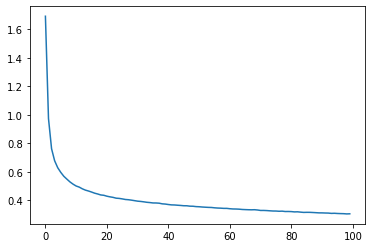

In [19]:
plt.plot(running_loss)